#
Business Study, Project-02, Ujjwal_Singh

###NETFLIX PROJECT

In [1]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
import numpy as np
import pandas as pd
netflix=pd.read_csv("netflix.csv")

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 27.3MB/s]


In [2]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
netflix.shape
# The Netflix has 8807 rows/ entries and 12 columns/ Headings

(8807, 12)

In [5]:
# Want to check(WTC)- show_id unique or not
netflix["show_id"].nunique()

8807

In [6]:
# WTC- How many type (TV shows/ Movies)
netflix["type"].nunique()
# 2
netflix["type"].value_counts()
# Movies: 6131 and TV shows: 2676

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [7]:
# WTC- For NaN(Not available) in various columns
np.any(netflix["type"].isna()==True)

False

In [8]:
np.any(netflix["director"].isna()==True)

True

In [9]:
np.any(netflix["listed_in"].isna()==True)

False

In [10]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

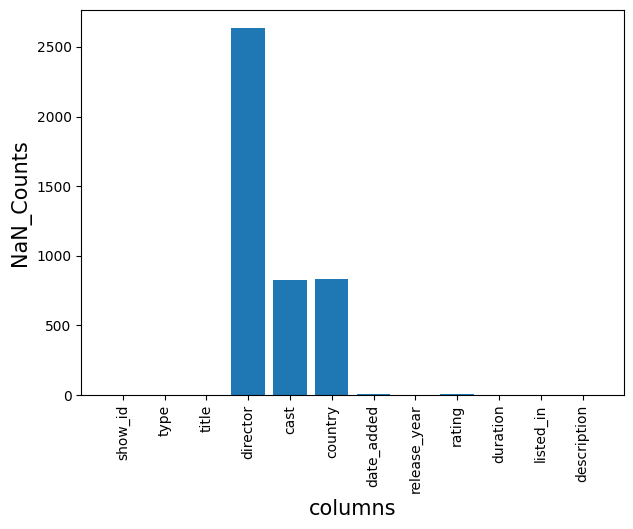

In [11]:
# represent number of Non available datas in various columns
import matplotlib.pyplot as plt
import seaborn as sns
DAV1= netflix.isna().sum()
plt.figure(figsize= (7,5))
plt.bar(DAV1.index, DAV1)
plt.xticks(rotation= 90, fontsize= 10)
plt.xlabel("columns", fontsize= 15)
plt.ylabel("NaN_Counts", fontsize= 15)
plt.show()

Columns with NaN entries;
a. director
b. cast
c. date_added
d. country
e. rating
f. duration

In [12]:
netflix2= netflix.drop(["description"], axis= 1)
# Droping "description" column from netflix table because of unneccessary details for analysis.

In [13]:
netflix2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [14]:
'''netflix2.loc[netflix2["director"]=="Julien Leclercq"]
# NaN of this director regarding country will be replaced with max.country like France.
'''

'netflix2.loc[netflix2["director"]=="Julien Leclercq"]\n# NaN of this director regarding country will be replaced with max.country like France.\n'

In [15]:
netflix2['country'] = netflix2['country'].fillna(netflix2['country'].mode()[0])
netflix2['cast'].replace(np.nan, 'No Data',inplace  = True)
netflix2['director'].replace(np.nan, 'No Data',inplace  = True)
netflix2.dropna(inplace=True)
# Drop Duplicates
netflix2.drop_duplicates(inplace= True)

In [16]:
netflix2.isna().sum()
# 02 countries and 13 directors rows also get droped from Dataframe

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [17]:
# After dropping few rows
netflix2.shape

(8790, 11)

In [18]:
netflix2.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [19]:
netflix2_Ind_Dir= netflix2.groupby("country")["title","director"].get_group("India")

<ipython-input-19-3f25d1042526>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  netflix2_Ind_Dir= netflix2.groupby("country")["title","director"].get_group("India")


In [20]:
DAV_Ind= netflix2_Ind_Dir["director"].value_counts().reset_index().head(10)
DAV_Ind.rename(columns= {"index":"director", "director":"count"}, inplace=True)

In [21]:
DAV_Ind
# netflix2_Ind_Dir["title"].nunique()
# 972 movies are launched in India till now
# In India David Dhawan makes maximum number of movies followed by Ram Gopal Verma, Imtiaz Ali and more...
# This analysis will be varified in Cell number 99 where this analysis seems wrong.
# Also for most active Director: Number of Movies launched by Director in his tenure.

,director,count
0,No Data,82
1,David Dhawan,9
2,Ram Gopal Varma,7
3,Rajkumar Santoshi,6
4,Imtiaz Ali,6
5,Anees Bazmee,6
6,Sooraj R. Barjatya,6
7,Anurag Kashyap,5
8,Indra Kumar,5
9,Mahesh Manjrekar,5


In [22]:
DAV_Ind.drop([0], axis=0, inplace= True)

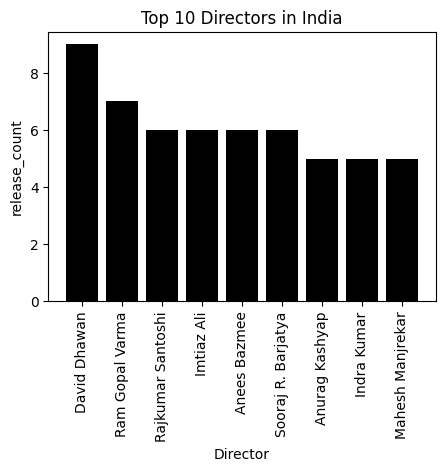

In [23]:
plt.figure(figsize= (5,3.5))
plt.bar(DAV_Ind["director"], DAV_Ind["count"], color= "black")
plt.xlabel("Director")
plt.ylabel("release_count")
plt.xticks(rotation= 90)
plt.title("Top 10 Directors in India")
plt.show()

In [24]:
netflix2_China_Dir= netflix2.groupby("country")["title","director"].get_group("China")
DAV_China= netflix2_China_Dir["director"].value_counts().reset_index().sort_values(["director"], ascending= False).head(10)
DAV_China.rename(columns= {"index":"director", "director":"count"}, inplace=True)
DAV_China
# Very surprising data is available for the Chinese Directors as any director launches only one movie/ TV series on Netflix.

<ipython-input-24-3bd60c933cca>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  netflix2_China_Dir= netflix2.groupby("country")["title","director"].get_group("China")


,director,count
0,No Data,37
1,Zhang Chong,1
28,Charles Martin,1
27,Zhao Ji,1
26,Xiao Feng,1
25,Li Weiran,1
24,Henri Wong,1
23,Guo Jingming,1
22,Teddy Chan,1
21,Yu Yang,1


In [25]:
netflix2_US_Dir= netflix2.groupby("country")["title","director"].get_group("United States")
DAV_US= netflix2_US_Dir["director"].value_counts().reset_index().sort_values(["director"], ascending= False).head(10)
DAV_US.rename(columns= {"index":"director", "director":"count"}, inplace=True)
DAV_US
# This Rajiv Chilaka is creating movies both from India and US.

<ipython-input-25-6dcd49173751>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  netflix2_US_Dir= netflix2.groupby("country")["title","director"].get_group("United States")


,director,count
0,No Data,1171
2,Rajiv Chilaka,16
1,Marcus Raboy,16
3,Suhas Kadav,15
4,Jay Karas,14
5,Jay Chapman,12
6,Martin Scorsese,8
7,Ryan Polito,8
8,Lance Bangs,8
9,Troy Miller,8


In [26]:
DAV_US.drop([0], axis=0, inplace= True)

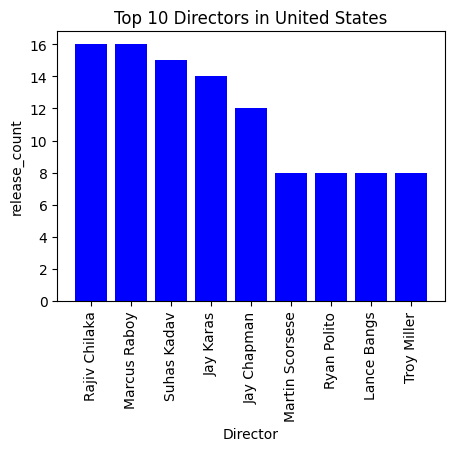

In [27]:
plt.figure(figsize= (5,3.5))
plt.bar(DAV_US["director"], DAV_US["count"], color= "blue")
plt.xlabel("Director")
plt.ylabel("release_count")
plt.xticks(rotation= 90)
plt.title("Top 10 Directors in United States")
plt.show()

In [28]:
Rajiv_C= netflix2.loc[netflix2["director"]=="Rajiv Chilaka"]
Rajiv_C

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2013,TV-Y7,65 min,Children & Family Movies
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2012,TV-Y7,68 min,Children & Family Movies
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies


In [29]:
netflix2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


In [30]:
# The datatype of date columns are object and we have to convert it into
# datetime bcoz to apply date time operators into these columns
netflix2["date_added"]=pd.to_datetime(netflix2["date_added"])

In [31]:
# TO work on Indian Directors
netflix2_Ind_Dir= netflix2.groupby("country")["title","director","date_added"].get_group("India")

<ipython-input-31-bfe08bf5a1a3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  netflix2_Ind_Dir= netflix2.groupby("country")["title","director","date_added"].get_group("India")


In [32]:
# extracting Years in separate column
netflix2_Ind_Dir["Year"]= netflix2_Ind_Dir["date_added"].dt.year

In [33]:
netflix2_Ind_Dir.head()

,title,director,date_added,Year
4,Kota Factory,No Data,2021-09-24,2021
24,Jeans,S. Shankar,2021-09-21,2021
39,Chhota Bheem,No Data,2021-09-16,2021
50,Dharmakshetra,No Data,2021-09-15,2021
66,Raja Rasoi Aur Anya Kahaniyan,No Data,2021-09-15,2021


In [34]:
# It returns count of movies, maximum year and minimum year of activeness of any perticular director.
netflix2_Ind_Dir_agg= netflix2_Ind_Dir.groupby("director")[["title","director","Year"]].aggregate(
    Year_max= ("Year","max"),
    Year_min= ("Year","min"),
    title_count= ("title", "count")
).reset_index().sort_values(["title_count"], ascending= False)

In [35]:
netflix2_Ind_Dir_agg.head()

,director,Year_max,Year_min,title_count
327,No Data,2021,2017,82
136,David Dhawan,2021,2017,9
420,Ram Gopal Varma,2021,2017,7
413,Rajkumar Santoshi,2020,2018,6
189,Imtiaz Ali,2020,2017,6


In [36]:
# To get active years
netflix2_Ind_Dir_agg["active_years"]= netflix2_Ind_Dir_agg["Year_max"] - netflix2_Ind_Dir_agg["Year_min"] + 1
netflix2_Ind_Dir_agg.head()

,director,Year_max,Year_min,title_count,active_years
327,No Data,2021,2017,82,5
136,David Dhawan,2021,2017,9,5
420,Ram Gopal Varma,2021,2017,7,5
413,Rajkumar Santoshi,2020,2018,6,3
189,Imtiaz Ali,2020,2017,6,4


In [37]:
netflix2_Ind_Dir_agg["active_dir"]= netflix2_Ind_Dir_agg["title_count"]/netflix2_Ind_Dir_agg["active_years"]
netflix2_Ind_Dir_agg.sort_values(["active_dir"], ascending= False).head()
# Here Umesh Mehra, Subhash Ghai, Hrishikesh mukherjee are among the most active Directors from India.
# Refer Cell number 99 for revised analysis.
# Similarly we can check for any country for business perspective.

,director,Year_max,Year_min,title_count,active_years,active_dir
327,No Data,2021,2017,82,5,16.4
598,Umesh Mehra,2017,2017,5,1,5.0
550,Subhash Ghai,2018,2018,4,1,4.0
188,Hrishikesh Mukherjee,2019,2019,4,1,4.0
391,Raj Kapoor,2019,2019,3,1,3.0


In [38]:
# For Movies/ TV Series in India
netflix2_Ind_typ= netflix2.groupby("country")["title","director","type"].get_group("India")

<ipython-input-38-6938e709f111>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  netflix2_Ind_typ= netflix2.groupby("country")["title","director","type"].get_group("India")


In [39]:
netflix2_Ind_typ.head()

,title,director,type
4,Kota Factory,No Data,TV Show
24,Jeans,S. Shankar,Movie
39,Chhota Bheem,No Data,TV Show
50,Dharmakshetra,No Data,TV Show
66,Raja Rasoi Aur Anya Kahaniyan,No Data,TV Show


In [40]:
netflix2_Ind_typ["type"].value_counts()
# Movies are in trend and successful In India

Movie      893
TV Show     79
Name: type, dtype: int64

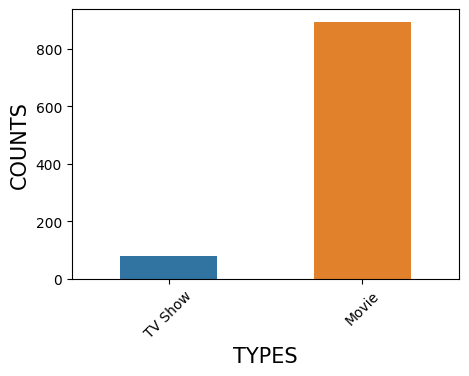

In [41]:
plt.figure(figsize= (5,3.5))
sns.countplot(data= netflix2_Ind_typ, x= "type", width= 0.5)
plt.xticks(rotation= 45, fontsize= 10)
plt.xlabel("TYPES", fontsize= 15)
plt.ylabel("COUNTS", fontsize= 15)
plt.show()

<ipython-input-42-192e31bea082>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  netflix2_Ind_typ= netflix2.groupby("country")["title","director","type"].get_group("Japan")


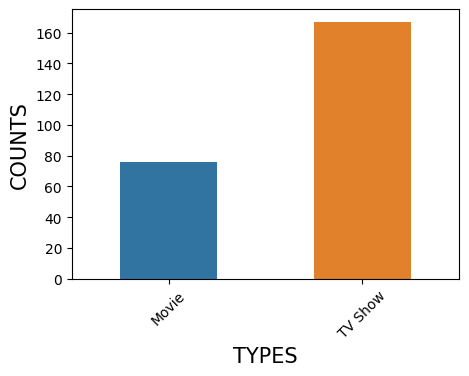

In [42]:
netflix2_Ind_typ= netflix2.groupby("country")["title","director","type"].get_group("Japan")
netflix2_Ind_typ["type"].value_counts()
plt.figure(figsize= (5,3.5))
sns.countplot(data= netflix2_Ind_typ, x= "type", width= 0.5)
plt.xticks(rotation= 45, fontsize= 10)
plt.xlabel("TYPES", fontsize= 15)
plt.ylabel("COUNTS", fontsize= 15)
plt.show()
# Here for Japan TV shows are more in numbers

In [43]:
# Due to Nesting of string values, difficult to get fair results
netflix2["country"].unique()
# Manipulated data, duplicacy

array(['United States', 'South Africa', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom,

In [44]:
netflix2["country"].value_counts()
# Duplicacy in output
# 748 entries, but several row entries with 2/3/4 country names.

United States                             3638
India                                      972
United Kingdom                             418
Japan                                      243
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [45]:
# Nesting of columns
# Nested trings can be un-nested by removing " , " from the DataFrame.
netflix2.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [46]:
# UN-NESTING of director column
# It symolize that the column contain "," or not (If there is difference between total returned rows and rows of DataFrame for individual column)
netflix2[netflix2.director.apply(lambda i:"," in str(i))]
# 614 rows as output against 8790 of DataFrame
# 614 entries have multiple directors, 2625 has NaN and remaining 5551 has single director entries.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",No Data,United States,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies"
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",United States,2021-09-21,2021,TV-Y,61 min,Children & Family Movies
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",United States,2021-09-17,2021,TV-14,111 min,"Dramas, Independent Movies, International Movies"
68,s69,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",Michael Schumacher,United States,2021-09-15,2021,TV-14,113 min,"Documentaries, International Movies, Sports Mo..."
...,...,...,...,...,...,...,...,...,...,...,...
8727,s8728,Movie,When Hari Got Married,"Ritu Sarin, Tenzing Sonam",No Data,"United Kingdom, India, United States",2016-12-25,2013,NR,75 min,"Documentaries, International Movies"
8728,s8729,Movie,When Two Worlds Collide,"Heidi Brandenburg, Mathew Orzel",No Data,"Peru, United States, United Kingdom",2016-11-30,2016,TV-14,103 min,"Documentaries, International Movies"
8737,s8738,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,United Kingdom,2019-02-01,2016,TV-14,50 min,Documentaries
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",No Data,United States,2017-03-31,1943,TV-PG,82 min,Documentaries


In [47]:
netflix2[netflix2.rating.apply(lambda i: "," in str(i))]
# no "," enteries

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in


In [48]:
netflix2[netflix2.country.apply(lambda i: "," in str(i))]
# 1320 rows has multiple country against 8790 rows in DF

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies"
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,Thrillers
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96 min,"Action & Adventure, Dramas"
46,s47,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan",2021-09-16,2012,R,115 min,Action & Adventure
...,...,...,...,...,...,...,...,...,...,...,...
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro",2016-07-01,2015,TV-MA,157 min,"Dramas, International Movies"
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France",2018-10-11,2016,TV-14,98 min,"Dramas, Independent Movies, International Movies"
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,No Data,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV"
8797,s8798,TV Show,Zak Storm,No Data,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV


In [49]:
netflix2[netflix2.cast.apply(lambda i: "," in str(i))]
# 7089 rows against 8790 rows in DF

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies
...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers"
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies"


In [50]:
netflix2[netflix2.title.apply(lambda i: "," in str(i))]
# While "," is also in title of movies but as we cross check that each movie's title has individual show_id
# Means that these are the movies with ',' in their name only

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S..."
140,s141,Movie,"El patrón, radiografía de un crimen",Sebastián Schindel,"Joaquín Furriel, Luis Ziembrowski, Guillermo P...","Argentina, Venezuela",2021-09-01,2014,TV-MA,100 min,"Dramas, International Movies, Thrillers"
206,s207,Movie,"LSD: Love, Sex Aur Dhokha",Dibakar Banerjee,"Nushrat Bharucha, Anshuman Jha, Neha Chauhan, ...",India,2021-08-27,2010,TV-MA,112 min,"Dramas, Independent Movies, International Movies"
221,s222,Movie,"Bob Ross: Happy Accidents, Betrayal & Greed",Joshua Rofé,Bob Ross,United States,2021-08-25,2021,TV-14,93 min,Documentaries
658,s659,TV Show,"Nevertheless,",No Data,"Song Kang, Han So-hee, Chae Jong-hyeop, Lee Yu...",United States,2021-06-20,2021,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8598,s8599,Movie,"To Wong Foo, Thanks for Everything! Julie Newmar",Beeban Kidron,"Patrick Swayze, Wesley Snipes, John Leguizamo,...",United States,2019-08-01,1995,PG-13,108 min,"Comedies, Cult Movies, LGBTQ Movies"
8628,s8629,Movie,"Trikal (Past, Present, Future)",Shyam Benegal,"Leela Naidu, Neena Gupta, Anita Kanwar, Soni R...",India,2019-12-31,1985,TV-14,134 min,"Comedies, Dramas, Independent Movies"
8647,s8648,Movie,"Twisted Trunk, Big Fat Body",No Data,"Vijay Maurya, Naman Jain, Usha Nadkarni, Mukes...",India,2017-01-15,2015,TV-14,89 min,"Dramas, International Movies"
8707,s8708,Movie,"We, the Marines",Greg MacGillivray,No Data,United States,2018-07-01,2017,TV-PG,38 min,"Documentaries, International Movies"


In [51]:
# Unnesting required for [director, cast, country, listed_in(genre)]
# renaming listed_in to genre
netflix2.rename(columns= {"listed_in":"genre"}, inplace= True)
netflix2.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [52]:
# unnesting of director column
netflix2_dir_s= netflix2[["title","director"]]
netflix2_dir_s["director"]=netflix2_dir_s["director"].apply(lambda i:str(i).split(", "))

<ipython-input-52-f32fa0a09a9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix2_dir_s["director"]=netflix2_dir_s["director"].apply(lambda i:str(i).split(", "))


In [53]:
netflix2_dir_s.head(2)
# LIST appeares in director's column

,title,director
0,Dick Johnson Is Dead,[Kirsten Johnson]
1,Blood & Water,[No Data]


In [54]:
netflix2_dir_s= netflix2_dir_s.explode("director")
# director column get separated wrt entries

In [55]:
netflix2_dir_s.info()
# comma separarted entries are now separated into new rows
# entries get increased to 9595

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9595 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9595 non-null   object
 1   director  9595 non-null   object
dtypes: object(2)
memory usage: 224.9+ KB


In [56]:
# unnesting of cast column
netflix2_cast_s= netflix2[["title","cast"]]
netflix2_cast_s["cast"]= netflix2_cast_s["cast"].apply(lambda i:str(i).split(", "))

<ipython-input-56-a3d14a46c775>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix2_cast_s["cast"]= netflix2_cast_s["cast"].apply(lambda i:str(i).split(", "))


In [57]:
netflix2_cast_s= netflix2_cast_s.explode("cast")

In [58]:
netflix2_cast_s.info()
# comma separarted entries are now separated into new rows
# entries get increased to 64841

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64841 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   64841 non-null  object
 1   cast    64841 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [59]:
# Un-Nesting of country column
netflix2_country_s= netflix2[["title","country","type"]]
netflix2_country_s["country"]= netflix2_country_s["country"].apply(lambda i:str(i).split(", "))
netflix2_country_s= netflix2_country_s.explode("country")
netflix2_country_s.info()
# entries get increased to 10828

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10828 non-null  object
 1   country  10828 non-null  object
 2   type     10828 non-null  object
dtypes: object(3)
memory usage: 338.4+ KB


<ipython-input-59-ab1fa0d71146>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix2_country_s["country"]= netflix2_country_s["country"].apply(lambda i:str(i).split(", "))


In [60]:
# Un-Nesting of genre column
netflix2_genre_s= netflix2[["title","genre"]]
netflix2_genre_s["genre"]= netflix2_genre_s["genre"].apply(lambda i:str(i).split(", "))
netflix2_genre_s= netflix2_genre_s.explode("genre")
netflix2_genre_s.info()
# entries get increased to 19294

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19294 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   19294 non-null  object
 1   genre   19294 non-null  object
dtypes: object(2)
memory usage: 452.2+ KB


<ipython-input-60-9ca5d0597ac7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix2_genre_s["genre"]= netflix2_genre_s["genre"].apply(lambda i:str(i).split(", "))


In [61]:
# Now we have 5 DataFrames for analysis: LISTED as [netflix2_dir_s, netflix2_cast_s, netflix2_genre_s, netflix2_country_s, netflix2]

In [62]:
# WTC: Want to convert date_added type from object to timestamp
netflix2["date_added"]= pd.to_datetime(netflix2["date_added"])

In [63]:
netflix2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  genre         8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


In [64]:
netflix2["added_year"]= netflix2["date_added"].dt.year
# It makes one new column representing year of adding the movies in name of "added_year"

In [65]:
netflix2["added_month"]= netflix2["date_added"].dt.month
# It makes one new column representing month of adding the movies in name of "added_month"

In [66]:
netflix2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,added_year,added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,9
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,9


In [67]:
# Most MOVIES/ TV SHOWS released in which month of year?
netflix2.groupby("added_month")["title","type"].ngroups
# 12 nos. of group form

<ipython-input-67-7bec2fee0534>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  netflix2.groupby("added_month")["title","type"].ngroups


12

In [68]:
netflix2_month= netflix2.groupby("added_month")["title"].count().reset_index()
netflix2_month.head()

,added_month,title
0,1,737
1,2,562
2,3,741
3,4,763
4,5,632


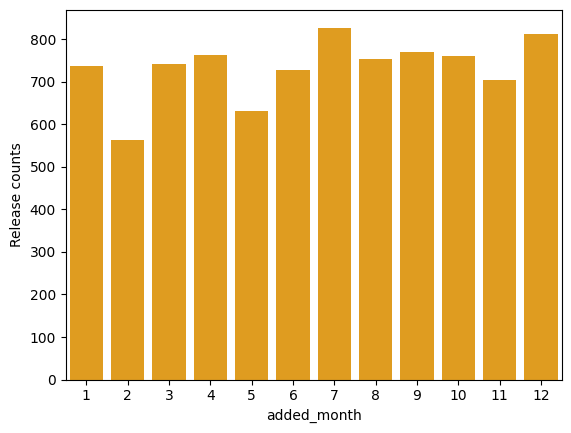

'\nAlthough the releases are almost same irrespective of months but we can say that\nthe "month of July and December are most active for releases and month of February and May are least active, but still considerable.\n'

In [69]:
sns.barplot(x= "added_month", y= "title", data= netflix2_month, color= "orange")
plt.ylabel("Release counts")
plt.show()
'''
Although the releases are almost same irrespective of months but we can say that
the "month of July and December are most active for releases and month of February and May are least active, but still considerable.
'''

In [70]:
netflix2_dir_s

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,No Data
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,No Data
4,Kota Factory,No Data
...,...,...
8802,Zodiac,David Fincher
8803,Zombie Dumb,No Data
8804,Zombieland,Ruben Fleischer
8805,Zoom,Peter Hewitt


In [71]:
# Data cleaning/ Handling the NaN data
# director missing value consider as "not available"
Join1= netflix2_dir_s.merge(netflix2, on= "title")
Join1.drop(["director_y"], axis=1, inplace=True)
Join1
# Here director_x contains single director in each row/ unnested director

,title,director_x,show_id,type,cast,country,date_added,release_year,rating,duration,genre,added_year,added_month
0,Dick Johnson Is Dead,Kirsten Johnson,s1,Movie,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9
1,Blood & Water,No Data,s2,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
2,Ganglands,Julien Leclercq,s3,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9
3,Jailbirds New Orleans,No Data,s4,TV Show,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,9
4,Kota Factory,No Data,s5,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9590,Zodiac,David Fincher,s8803,Movie,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019,11
9591,Zombie Dumb,No Data,s8804,TV Show,No Data,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",2019,7
9592,Zombieland,Ruben Fleischer,s8805,Movie,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",2019,11
9593,Zoom,Peter Hewitt,s8806,Movie,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",2020,1


In [72]:
# Check for duplicates in Join1 dataFrame
Join1.loc[Join1.duplicated()]
Join1.drop_duplicates(inplace= True)

In [73]:
Join1

,title,director_x,show_id,type,cast,country,date_added,release_year,rating,duration,genre,added_year,added_month
0,Dick Johnson Is Dead,Kirsten Johnson,s1,Movie,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9
1,Blood & Water,No Data,s2,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
2,Ganglands,Julien Leclercq,s3,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9
3,Jailbirds New Orleans,No Data,s4,TV Show,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,9
4,Kota Factory,No Data,s5,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9590,Zodiac,David Fincher,s8803,Movie,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019,11
9591,Zombie Dumb,No Data,s8804,TV Show,No Data,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",2019,7
9592,Zombieland,Ruben Fleischer,s8805,Movie,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",2019,11
9593,Zoom,Peter Hewitt,s8806,Movie,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",2020,1


In [74]:
# Data cleaning/ Handling the NaN data
# unique value count
Join1["rating"].nunique()
Join1["director_x"].nunique()
Join1["show_id"].nunique()
Join1["type"].nunique()
Join1["added_month"].nunique()

12

In [75]:
# Now we have 5 DataFrames for analysis: LISTED as [netflix2_dir_s, netflix2_cast_s, netflix2_genre_s, netflix2_country_s, netflix2]

In [76]:
exp= Join1.iloc[:,[0,1,5]]
exp
DAV_T_C= exp.groupby("director_x")["title","country"].nunique().reset_index().sort_values(["title"], ascending= False).head(10)
DAV_T_C

<ipython-input-76-93c393bace3b>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  DAV_T_C= exp.groupby("director_x")["title","country"].nunique().reset_index().sort_values(["title"], ascending= False).head(10)


,director_x,title,country
3376,No Data,2621,188
3748,Rajiv Chilaka,22,2
1905,Jan Suter,21,4
3799,Raúl Campos,19,4
2864,Marcus Raboy,16,1
4456,Suhas Kadav,16,2
1953,Jay Karas,15,1
754,Cathy Garcia-Molina,13,1
1950,Jay Chapman,12,1
4940,Youssef Chahine,12,4


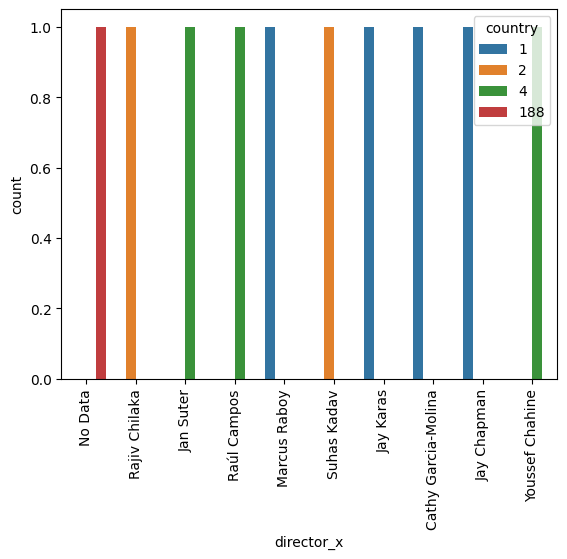

In [77]:
sns.countplot(x="director_x", data= DAV_T_C, hue= "country")
plt.xticks(rotation= 90)
plt.show()

In [78]:
'''
Here we cross checked very important insight that due to NaN value in "country" column, my analysis
of most active director for India gone wrong as the analysis says
"Umesh Mehra, Subhash Ghai, Hrishikesh mukherjee are among the most active Directors from India".
Now i can say that "Rajiv Chilaka" releases most number of movies as well as most active director from India.
'''
Rajiv_C2= Join1.loc[Join1["director_x"]=="Rajiv Chilaka"]
Rajiv_C2

,title,director_x,show_id,type,cast,country,date_added,release_year,rating,duration,genre,added_year,added_month
441,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,s407,Movie,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,2021,7
442,Chhota Bheem & Ganesh,Rajiv Chilaka,s408,Movie,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2009,TV-Y7,68 min,Children & Family Movies,2021,7
443,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,s409,Movie,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2011,TV-Y7,67 min,Children & Family Movies,2021,7
444,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,s410,Movie,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2010,TV-Y7,66 min,Children & Family Movies,2021,7
445,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,s411,Movie,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,2021,7
446,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,s412,Movie,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,2021,7
447,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,s413,Movie,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2013,TV-Y7,65 min,Children & Family Movies,2021,7
448,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,s414,Movie,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,2021,7
449,Chhota Bheem Aur Hanuman,Rajiv Chilaka,s415,Movie,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2012,TV-Y7,68 min,Children & Family Movies,2021,7
450,Chhota Bheem aur Krishna,Rajiv Chilaka,s416,Movie,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2009,TV-Y7,68 min,Children & Family Movies,2021,7


In [79]:
Rajiv_C

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2013,TV-Y7,65 min,Children & Family Movies
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 22, 2021",2012,TV-Y7,68 min,Children & Family Movies
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies


In [80]:
Join2= netflix2_cast_s.merge(Join1, on= "title")
Join2.drop(["cast_y"], axis=1, inplace=True)

In [81]:
Join2.loc[Join2.duplicated()]
Join2.drop_duplicates(inplace= True)

In [82]:
Join2

,title,cast_x,director_x,show_id,type,country,date_added,release_year,rating,duration,genre,added_year,added_month
0,Dick Johnson Is Dead,No Data,Kirsten Johnson,s1,Movie,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9
1,Blood & Water,Ama Qamata,No Data,s2,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
2,Blood & Water,Khosi Ngema,No Data,s2,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
3,Blood & Water,Gail Mabalane,No Data,s2,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
4,Blood & Water,Thabang Molaba,No Data,s2,TV Show,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70689,Zubaan,Manish Chaudhary,Mozez Singh,s8807,Movie,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,3
70690,Zubaan,Meghna Malik,Mozez Singh,s8807,Movie,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,3
70691,Zubaan,Malkeet Rauni,Mozez Singh,s8807,Movie,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,3
70692,Zubaan,Anita Shabdish,Mozez Singh,s8807,Movie,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,3


In [83]:
Join2["cast_x"].nunique()

36393

In [84]:
'''If we merge the cast column with netflix2 column, then output rows are less in number
This is due to fact that the multiplication across the column of title and cast
director column aleady merge with title makes two extra rows and when cast going to merge
It multiplies with both rows which was single in case of meger with netflix2
'''
Join3= netflix2_cast_s.merge(netflix2, on= "title")
Join3.drop(["cast_y"], axis=1, inplace=True)

In [85]:
Join3.drop_duplicates(inplace= True)

In [86]:
Join3

,title,cast_x,show_id,type,director,country,date_added,release_year,rating,duration,genre,added_year,added_month
0,Dick Johnson Is Dead,No Data,s1,Movie,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9
1,Blood & Water,Ama Qamata,s2,TV Show,No Data,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
2,Blood & Water,Khosi Ngema,s2,TV Show,No Data,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
3,Blood & Water,Gail Mabalane,s2,TV Show,No Data,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
4,Blood & Water,Thabang Molaba,s2,TV Show,No Data,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64836,Zubaan,Manish Chaudhary,s8807,Movie,Mozez Singh,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,3
64837,Zubaan,Meghna Malik,s8807,Movie,Mozez Singh,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,3
64838,Zubaan,Malkeet Rauni,s8807,Movie,Mozez Singh,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,3
64839,Zubaan,Anita Shabdish,s8807,Movie,Mozez Singh,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,3


In [87]:
Join3["cast_x"].nunique()

36393

In [88]:
Join4= netflix2_genre_s.merge(Join2, on= "title")
Join4.drop(["genre_y"], axis=1, inplace=True)
Join4.drop_duplicates(inplace= True)

In [89]:
Join4["genre_x"].nunique()

42

In [90]:
Join5= netflix2_country_s.merge(Join4, on= "title")
Join5.drop(["country_y"], axis=1, inplace=True)
Join5.drop_duplicates(inplace= True)

In [91]:
Join5["country_x"].nunique()

127

In [92]:
# exp1= Join3.iloc[:,[0,1,5]]
# exp1
# Join1.groupby("cast")["title","country"].count().reset_index().sort_values(["title"], ascending= False)
# Join1.groupby("director_x")["title","country"].count().reset_index().sort_values(["title"], ascending= False)
# Join5.groupby("cast_x")["title","country_x"].count().reset_index().sort_values(["title"], ascending= False)
# Join1.groupby("genre")["title","country"].count().reset_index().sort_values(["title"], ascending= False)
# Join5.groupby("genre_x")["title","country_x"].count().reset_index().sort_values(["title"], ascending= False)

In [93]:
'''netflix2_country_dav = netflix2_country_s[["title", "type", "country"]]
netflix2_country_dav = netflix2_country_dav.groupby(['country', 'type'])["title"].count().reset_index().sort_values('title', ascending= False)
netflix2_country_dav = netflix2_country_dav.rename(columns = {"title": "release_counts",})

netflix2_country_movie = netflix2_country_dav.query("type == 'Movie'").head(10)
fig1 = plt.bar(netflix2_country_dav.index, netflix2_country_dav[""],color= "Blue")
plt.title("Top 10 countries for movies")

fig1.show()
# fig2.show()
'''

'netflix2_country_dav = netflix2_country_s[["title", "type", "country"]]\nnetflix2_country_dav = netflix2_country_dav.groupby([\'country\', \'type\'])["title"].count().reset_index().sort_values(\'title\', ascending= False)\nnetflix2_country_dav = netflix2_country_dav.rename(columns = {"title": "release_counts",})\n\nnetflix2_country_movie = netflix2_country_dav.query("type == \'Movie\'").head(10)\nfig1 = plt.bar(netflix2_country_dav.index, netflix2_country_dav[""],color= "Blue")\nplt.title("Top 10 countries for movies")\n\nfig1.show()\n# fig2.show()\n'

In [94]:
netflix2_country_movie = netflix2_country_s.query("type == 'Movie'").head(10)
netflix2_country_movie

,title,country,type
0,Dick Johnson Is Dead,United States,Movie
6,My Little Pony: A New Generation,United States,Movie
7,Sankofa,United States,Movie
7,Sankofa,Ghana,Movie
7,Sankofa,Burkina Faso,Movie
7,Sankofa,United Kingdom,Movie
7,Sankofa,Germany,Movie
7,Sankofa,Ethiopia,Movie
9,The Starling,United States,Movie
12,Je Suis Karl,Germany,Movie


In [95]:
'''
netflix2_country= netflix2[["show_id","title","type","country"]]
netflix2_country= (netflix2_country.drop('country', axis=1)
             .join(netflix2_country.country.str.split(', ',expand=True)
             .stack().reset_index(drop=True, level=1).rename('country')))
             '''

'\nnetflix2_country= netflix2[["show_id","title","type","country"]]\nnetflix2_country= (netflix2_country.drop(\'country\', axis=1)\n             .join(netflix2_country.country.str.split(\', \',expand=True)\n             .stack().reset_index(drop=True, level=1).rename(\'country\')))\n             '

In [96]:
netflix2_country_s_DAV = netflix2_country_s[["title", "country"]]
netflix2_country_s_DAV = netflix2_country_s_DAV.groupby(['country'])["title"].count().reset_index().sort_values('title', ascending= False).head(10)
netflix2_country_s_DAV = netflix2_country_s_DAV.rename(columns = {"title": "movies_count"})
netflix2_country_s_DAV

,country,movies_count
119,United States,4509
47,India,1046
117,United Kingdom,803
22,Canada,445
38,France,393
55,Japan,316
105,Spain,232
103,South Korea,231
40,Germany,226
69,Mexico,169


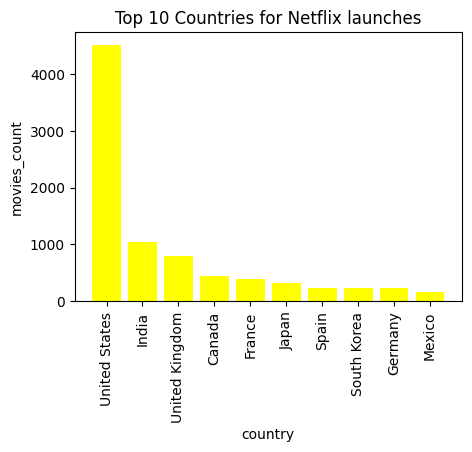

In [97]:
plt.figure(figsize= (5,3.5))
plt.bar(netflix2_country_s_DAV["country"], netflix2_country_s_DAV["movies_count"], color= "Yellow")
plt.xlabel("country")
plt.ylabel("movies_count")
plt.xticks(rotation= 90)
plt.title("Top 10 Countries for Netflix launches")
plt.show()

In [98]:
netflix2_genre_s_DAV = netflix2_genre_s[["title", "genre"]]
netflix2_genre_s_DAV = netflix2_genre_s_DAV.groupby(['genre'])["title"].count().reset_index().sort_values('title', ascending= False)
netflix2_genre_s_DAV.shape

(42, 2)

In [99]:
netflix2_genre_s_DAV = netflix2_genre_s_DAV.rename(columns = {"title": "movies_count"}).head(10)
netflix2_genre_s_DAV

,genre,movies_count
16,International Movies,2752
12,Dramas,2426
7,Comedies,1674
17,International TV Shows,1349
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,762
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


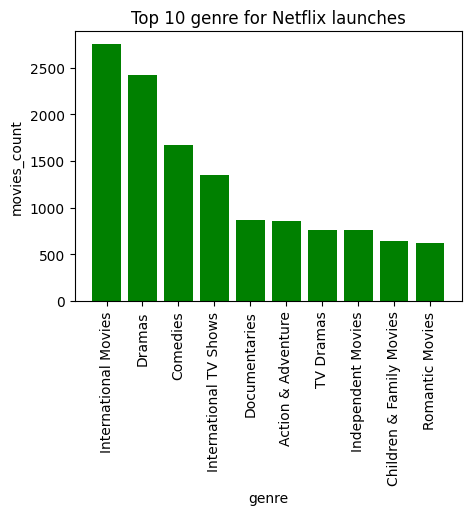

In [100]:
plt.figure(figsize= (5,3.5))
plt.bar(netflix2_genre_s_DAV["genre"], netflix2_genre_s_DAV["movies_count"], color= "green")
plt.xlabel("genre")
plt.ylabel("movies_count")
plt.xticks(rotation= 90)
plt.title("Top 10 genre for Netflix launches")
plt.show()

In [101]:
netflix2_rating_s_DAV = netflix2[["title", "rating"]]
netflix2_rating_s_DAV = netflix2_rating_s_DAV.groupby(['rating'])["title"].count().reset_index().sort_values('title', ascending= False)

In [102]:
netflix2_rating_s_DAV = netflix2_rating_s_DAV.rename(columns = {"title": "count"})
netflix2_rating_s_DAV

,rating,count
8,TV-MA,3205
6,TV-14,2157
9,TV-PG,861
5,R,799
4,PG-13,490
11,TV-Y7,333
10,TV-Y,306
3,PG,287
7,TV-G,220
2,NR,79


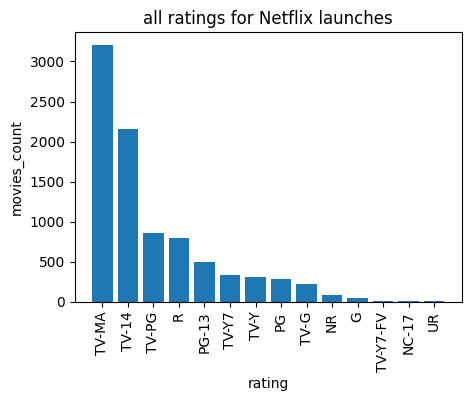

In [103]:
plt.figure(figsize= (5,3.5))
plt.bar(netflix2_rating_s_DAV["rating"], netflix2_rating_s_DAV["count"])
plt.xlabel("rating")
plt.ylabel("movies_count")
plt.xticks(rotation= 90)
plt.title("all ratings for Netflix launches")
plt.show()

In [104]:
netflix2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,added_year,added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,9
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019,11
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",2019,7
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",2020,1


In [105]:
netflix2_launches_DAV = netflix2.query("added_year >= 2005")
netflix2_launches_DAV = netflix2.groupby(["added_year","type"])["show_id"].count().reset_index()
netflix2_launches_DAV

,added_year,type,show_id
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


In [106]:
netflix2_launches_M_DAV= netflix2_launches_DAV.query("type == 'Movie'")
netflix2_launches_TV_DAV= netflix2_launches_DAV.query("type == 'TV Show'")

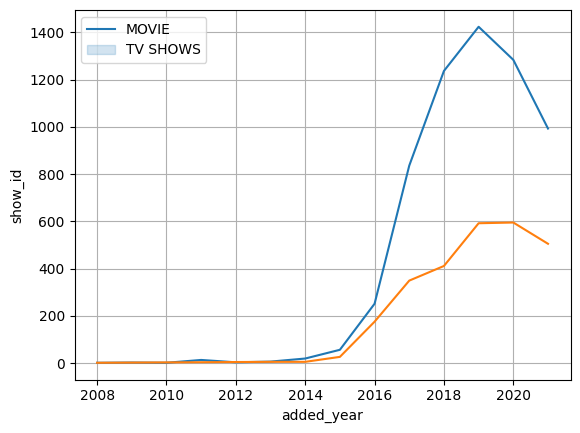

In [107]:
sns.lineplot(x="added_year", y="show_id", data= netflix2_launches_M_DAV)
sns.lineplot(x="added_year", y="show_id", data= netflix2_launches_TV_DAV)
plt.legend(["MOVIE","TV SHOWS"], loc="upper left")
plt.grid()
plt.show()

ATTEMPT 02:-
NETFLIX DATA SET

In [108]:
#1
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 25.3MB/s]


In [109]:
#2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
netflix= pd.read_csv("netflix.csv")

In [110]:
#3
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [111]:
#4
len(netflix)

8807

In [112]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [113]:
#5
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

1. show_id and title are only unique entries for the table.
2. this unique count of director/ cast/ country/ listed_in are manipulated because of nested data (,).
3. release_year: 74 means the avalable data is for 74 years.

In [114]:
#6
netflix["director"].count()

6173

1. Similarly we can validate N/A entries among the various columns.
2. Out of 8807 entries for director column only 6173 entries available while other 2634 entries are not available.
3. similarly checked for other.

In [115]:
#7
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [116]:
# cast and country can be varified also
netflix["date_added"].count()

8797

In [117]:
#8
# time period of movies in data-set
print(netflix["release_year"].min(),"-",netflix["release_year"].max())

1925 - 2021


In [118]:
#9
netflix["rating"].value_counts()
# Observaiton: rating such as 74 min/ 84 min/ 66 min have no sense(mentioned here by mistake).

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [119]:
#10
# Un-Nesting of director column
n_d= netflix[["title","director"]]
n_d["director"]= n_d["director"].apply(lambda i:str(i).split(", "))
n_d= n_d.explode("director")
n_d

<ipython-input-119-0fde8fccb033>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_d["director"]= n_d["director"].apply(lambda i:str(i).split(", "))


,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
8802,Zodiac,David Fincher
8803,Zombie Dumb,nan
8804,Zombieland,Ruben Fleischer
8805,Zoom,Peter Hewitt


In [120]:
#11 (Un-nesting)
con1 = netflix['director'].apply(lambda x: str(x).split(', ')).tolist()
# Director Array separate out kar ke LIST me convert kiya gaya hai.
con1_new=pd.DataFrame(con1,index=netflix['title'])
# DataFrame banaya Gaya hai by using LIST- con1 and Netflix['title']
# Its looks with 8807 rows and 13 columns
con1_new=con1_new.stack()
# stacking of data so return 9612 rows(panda series)
# hstack and vstack is different than stack function
con1_new= con1_new.reset_index()
con1_new.rename(columns= {0:"director"}, inplace= True)
con1_new.drop(["level_1"], axis=1, inplace= True)

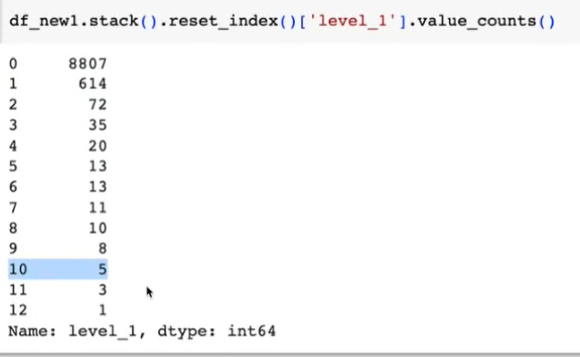

In [121]:
con1_new
# Same result as above method (9612 rows)
# stack function is like to melt the rows into straight list

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [122]:
#12
con2 = netflix['cast'].apply(lambda x: str(x).split(', ')).tolist()
# Cast Array separate out kar ke LIST me convert kiya gaya hai.
con2_new=pd.DataFrame(con2,index=netflix['title'])
# DataFrame banaya Gaya hai by using LIST- con2 and Netflix['title']
# Its looks with 8807 rows and 50 columns
con2_new=con2_new.stack()
# stacking of data so return 64951 rows(panda series)
con2_new= con2_new.reset_index()
con2_new.rename(columns= {0:"cast"}, inplace= True)
con2_new.drop(["level_1"], axis=1, inplace= True)

In [123]:
#13
n_g= netflix[["title","listed_in"]]
n_g["listed_in"]= n_g["listed_in"].apply(lambda i:str(i).split(", "))
n_g= n_g.explode("listed_in")
n_g
# Gives 19323 rows

<ipython-input-123-bedd505df0b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_g["listed_in"]= n_g["listed_in"].apply(lambda i:str(i).split(", "))


,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows
...,...,...
8805,Zoom,Children & Family Movies
8805,Zoom,Comedies
8806,Zubaan,Dramas
8806,Zubaan,International Movies


In [124]:
#14
con3 = netflix['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
# listed_in Array separate out kar ke LIST me convert kiya gaya hai.
con3_new=pd.DataFrame(con3,index=netflix['title'])
# DataFrame banaya Gaya hai by using LIST- con3 and Netflix['listed_in']
# Its looks with 8807 rows and 03 columns
con3_new=con3_new.stack()
# stacking of data so return 19323 rows(panda series)
con3_new= con3_new.reset_index()
con3_new.rename(columns= {0:"genre"}, inplace= True)
con3_new.drop(["level_1"], axis=1, inplace= True)

In [125]:
con3_new

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [126]:
#15
n_c= netflix[["title","country"]]
n_c["country"]= n_c["country"].apply(lambda i:str(i).split(", "))
n_c= n_c.explode("country")
n_c
# Gives 10845 rows

<ipython-input-126-ecfa247c2716>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_c["country"]= n_c["country"].apply(lambda i:str(i).split(", "))


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
8802,Zodiac,United States
8803,Zombie Dumb,nan
8804,Zombieland,United States
8805,Zoom,United States


In [127]:
#16
# merging the various dataFrames i.e. con1_new, con2_new, con3_new, n_c
con4= con1_new.merge(con2_new, on=["title"], how= "inner")
con5= con4.merge(con3_new, on=["title"], how= "inner")
con6= con5.merge(n_c, on=["title"], how= "inner")

In [128]:
#17
con6
# gives 201991 rows are available now

,title,director,cast,genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa
...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India
201987,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India


In [129]:
#18
# replacing "nan" from major 03 columns named as- cast, country, director
con6["director"].replace(["nan"],["N/A"], inplace= True)
con6["cast"].replace(["nan"],["N/A"], inplace= True)
con6["country"].replace(["nan"],[np.nan], inplace= True)

In [130]:
con6

,title,director,cast,genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,N/A,Documentaries,United States
1,Blood & Water,N/A,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,N/A,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,N/A,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,N/A,Khosi Ngema,International TV Shows,South Africa
...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India
201987,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India


In [131]:
#19
# nesting with "netflix"
netflix_2= con6.merge(netflix[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']], on=['title'], how='inner')
netflix_2

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,N/A,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,N/A,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,N/A,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,N/A,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,N/A,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201987,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [132]:
#20
netflix_2.isnull().sum()
# this null value in country column is due to merging the dataframes and dateadded get multiplied

title               0
director            0
cast                0
genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [133]:
#21
# To treat the duration and rating columns bcoz of these 'min' entries
netflix_2["rating"].value_counts()

TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

In [134]:
#22
# duration ke 'na' cell  ko fill kiya 'rating' ki entries se and then save kiya gaya is new dataframe me
netflix_2.loc[netflix_2["duration"].isna(), "duration"] = netflix_2.loc[netflix_2["duration"].isna(), "duration"].fillna(netflix_2["rating"])
# than treat the rating column with 'min' entries to 'N/A'.
netflix_2.loc[netflix_2["rating"].str.contains('min', na= False), "rating"] = "No rating"
netflix_2.isna().sum()

title               0
director            0
cast                0
genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [135]:
#23
# Rating also has 67 nan values
netflix_2["rating"].fillna("No rating", inplace= True)

In [136]:
netflix_2.isna().sum()

title               0
director            0
cast                0
genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [137]:
#24
# Now for date_added column
# This can be acheived by using the mode of date added for perticular release year.
# like release year = 2020 ki 8 movies hain, jisme ek ka date added missing hai- so mode of date added for other 7 entries
# ko pakad kar replace kar denge.
for i in netflix_2.loc[netflix_2["date_added"].isna()]["release_year"].unique():
  repo= netflix_2.loc[netflix_2["release_year"]==i]["date_added"].mode().values[0]
  netflix_2.loc[netflix_2['release_year']==i,'date_added'] = netflix_2.loc[netflix_2["release_year"]==i,"date_added"].fillna(repo)

In [138]:
#25
# similarly for country column by the help of director's column
for i in netflix_2.loc[netflix_2["country"].isna()]["director"].unique():
  if i in netflix_2[~netflix_2["country"].isnull()]["director"].unique(): # Tilde is used for "not"
  # means country column is not null value
    repo_1= netflix_2[netflix_2['director']==i]['country'].mode().values[0]
    netflix_2.loc[netflix_2['director']==i,'country'] = netflix_2.loc[netflix_2["director"]==i,'country'].fillna(repo_1)
# we run loop here to check every such unique director

So we imputed the country column on the basis of directors whose other movie titles had countries given. But there might be directors who have only one occurence in our data. In that scenario, I have used Actors as a basis. i.e- for this Actor majorly acts in movies of which country? Imputation has been done on this basis.

In [139]:
#26
for i in netflix_2[netflix_2["country"].isnull()]["cast"].unique():
  if i in netflix_2[~netflix_2["country"].isnull()]["cast"].unique():
    repo_2= netflix_2[netflix_2["cast"]==i]['country'].mode().values[0]
    netflix_2.loc[netflix_2["cast"]==i,"country"]=netflix_2.loc[netflix_2["cast"]==i,"country"].fillna(repo_2)

In [140]:
#27
# For remaining rows, country has been filled as Unknown Country (about 2067 entries)
netflix_2["country"].fillna("Unknown dountry", inplace=True)

In [141]:
netflix_2.isnull().sum()

title           0
director        0
cast            0
genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [142]:
#28
# removal of 'min' from duration column
netflix_2["duration"]= netflix_2["duration"].str.replace("min", "")

In [143]:
#29
netflix_2.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,N/A,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,N/A,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,N/A,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,N/A,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,N/A,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
